In [ ]:
# Question 2 
# EM algorithm for Gaussian Mixture Model

In [139]:
import numpy as np
import scipy.stats as stats

class GMM:
    def __init__(self, k, tol=1e-4):
        self.k = k
        self.tol = tol
        self.nIter = None
        self.pi = None
        self.mu = None
        self.sigma = None

    def EM(self, X, given_pi, given_mu, given_sigma, n_iter):
        self.pi = given_pi
        self.mu = given_mu
        self.sigma = given_sigma
        self.nIter = n_iter

        for i in range(self.nIter):
            prev_mu = self.mu
            
            # Expectation step
            w = self.Expectation(X, self.k, self.pi, self.mu, self.sigma)
            
            # Maximization step
            self.mu = self.MaximizeMean(X, self.k, w)
            curr_sigma = self.sigma
            self.sigma = self.MaximizeCovariance(X, self.k, w, self.mu)
            self.pi = self.MaximizeMixtures(self.k, w)
            print("Epoch:", i ,"Mu:",np.max(np.abs(prev_mu - self.mu)))
            if np.max(np.abs(prev_mu - self.mu)) < self.tol and np.max(np.abs(curr_sigma - self.sigma)) < self.tol:
                break
        return self.mu, self.sigma, self.pi
                
    def Expectation(self, X, k, pi, mu, sigma):
        w = np.zeros((X.shape[0], k))
        for i in range(k):
            w[:, i] = pi[i] * stats.multivariate_normal.pdf(X, mu[i], sigma[i])
        w = w / np.sum(w, axis=1, keepdims=True)
        return w

    def MaximizeMean(self, X, k, w):
        mu = np.zeros((k, X.shape[1]))
        for i in range(k):
            mu[i] = np.average(X, axis=0, weights=w[:, i])
        return mu
    
    def MaximizeCovariance(self, X, k, w, mu):
        d = X.shape[1]
        sigma = np.zeros((k, d, d))
        for i in range(k):
            X_deviates = X - mu[i]
            sigma[i] = np.dot((X_deviates.T * w[:, i]), X_deviates) / np.sum(w[:, i])
            # Make sure the covariance matrix is positive definite
            sigma[i] += 1e-6 * np.eye(d)
        return sigma
    def MaximizeMixtures(self, k, w):
        pi = np.sum(w, axis=0) / np.sum(w)
        return pi
    def predict(self, X):
        resps = np.zeros((X.shape[0], self.k))
        for j in range(self.k):
            resps[:, j] = self.pi[j] * stats.multivariate_normal.pdf(X, self.mu[j], self.sigma[j])
        return np.argmax(resps, axis=1)


Epoch: 0 Mu: 2.3586257194909734
Epoch: 1 Mu: 0.25231933608358625
Epoch: 2 Mu: 0.10339804476997827
Epoch: 3 Mu: 0.06810407111791428
Epoch: 4 Mu: 0.07239601413439334
Epoch: 5 Mu: 0.07954179873581857
Epoch: 6 Mu: 0.08708402083767397
Epoch: 7 Mu: 0.09420006635904732
Epoch: 8 Mu: 0.1007117385397599
Epoch: 9 Mu: 0.10710695532060743
Epoch: 10 Mu: 0.11436066839877856
Epoch: 11 Mu: 0.1238464481046131
Epoch: 12 Mu: 0.13739503489427207
Epoch: 13 Mu: 0.1574268178582583
Epoch: 14 Mu: 0.1868166851520896
Epoch: 15 Mu: 0.2273269370294353
Epoch: 16 Mu: 0.27321366588231655
Epoch: 17 Mu: 0.29123958590576704
Epoch: 18 Mu: 0.20577986568371065
Epoch: 19 Mu: 0.07605161494742196
Epoch: 20 Mu: 0.0339338552777102
Epoch: 21 Mu: 0.030163401595281636
Epoch: 22 Mu: 0.03022805091118541
Epoch: 23 Mu: 0.03160366111490087
Epoch: 24 Mu: 0.033918016147792995
Epoch: 25 Mu: 0.03528026533660378
Epoch: 26 Mu: 0.03603487420734153
Epoch: 27 Mu: 0.03640680657041373
Epoch: 28 Mu: 0.03654340943357792
Epoch: 29 Mu: 0.0365465151222

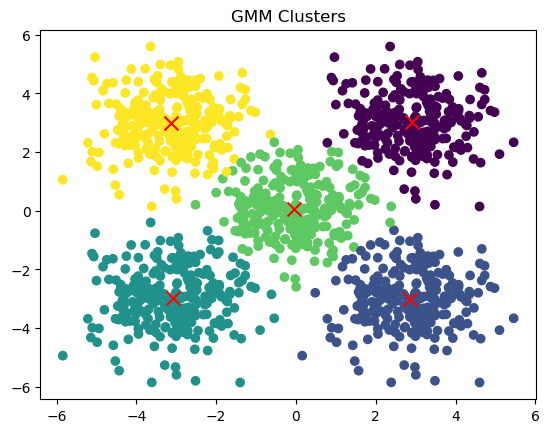

In [142]:
import matplotlib.pyplot as plt
from sklearn import datasets

# iris = datasets.load_iris()
# X = iris.data
X = np.loadtxt('EMData.txt')
n, d = X.shape
# Number of clusters
k = 5
# Initialize the parameters
pi = np.ones(k) / k
mu = X[np.random.choice(n, k, replace=False)]
sigma = np.tile(np.eye(d), (k, 1, 1))
# Fit the model
gmm = GMM(k)
Mu, Sigma, Pi = gmm.EM(X, pi, mu, sigma, 100)
print('Mu:\n', Mu)
print('Sigma:\n', Sigma)
print('Pi:\n', Pi)
# Plot the clustering results
plt.scatter(X[:, 0], X[:, 1], c=gmm.predict(X))
plt.scatter(Mu[:, 0], Mu[:, 1], s=100, marker='x', c='red')
plt.title('GMM Clusters')
plt.show()


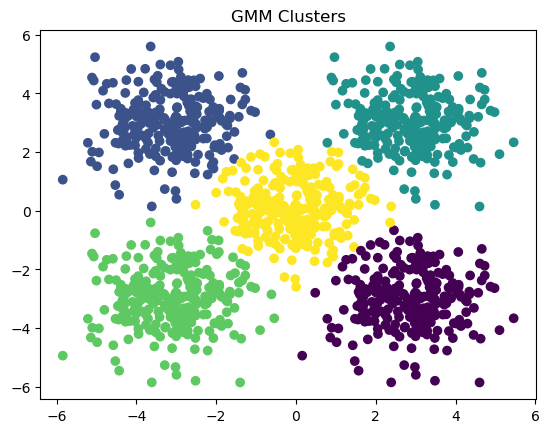

My implementation means:
 [[ 2.90570601  3.0404012 ]
 [ 2.86590474 -3.01528639]
 [-3.09289228 -2.97083397]
 [-0.0412859   0.0605259 ]
 [-3.12810226  2.98880587]]
SKlearn implementation means:
 [[ 2.86408568 -3.01412176]
 [-3.13076565  2.99058814]
 [ 2.90506556  3.03788714]
 [-3.0926839  -2.97141637]
 [-0.0467073   0.0639718 ]]


In [143]:
from sklearn.mixture import GaussianMixture
_gmm = GaussianMixture(n_components=5)
_gmm.fit(X)
labels = _gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('GMM Clusters')
plt.show()
print("My implementation means:\n",Mu)
print("SKlearn implementation means:\n",_gmm.means_)